# Summary of the CRISP-DM Process


## 1. Business Understanding
- Q.1 What factors affect the price of a home?　
- Q.2 Which condition homes can be purchased and renovated to make money?
- Q.3 

## 2. Data Understanding
- [Ames Housing Data](https://www.kaggle.com/c/house-prices-advanced-regression-techniques), which includes 81 features describing a wide range of characteristics of 1,460 homes in Ames, Iowa sold between 2006 and 2010.
- Numeric vs. Categorical : 30 vs. 51
- 

## 3. Prepare Data
- Select high related features w/o multicollinearity
- Encode categoricals
- Transfor 'SalePrice' to log scale

## 4. Model Data
- Train a liner model

## 5. Evaluate the Results
- Calculate metrix as r2 score

## 6. Deploy
- Predict test data and submitt


## 2. Data Understanding

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [3]:
df_train.shape

(1460, 81)

In [4]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [5]:
df_train.select_dtypes(include=['float', 'int']).shape, df_train.select_dtypes(include=['object']).shape

((1460, 38), (1460, 43))

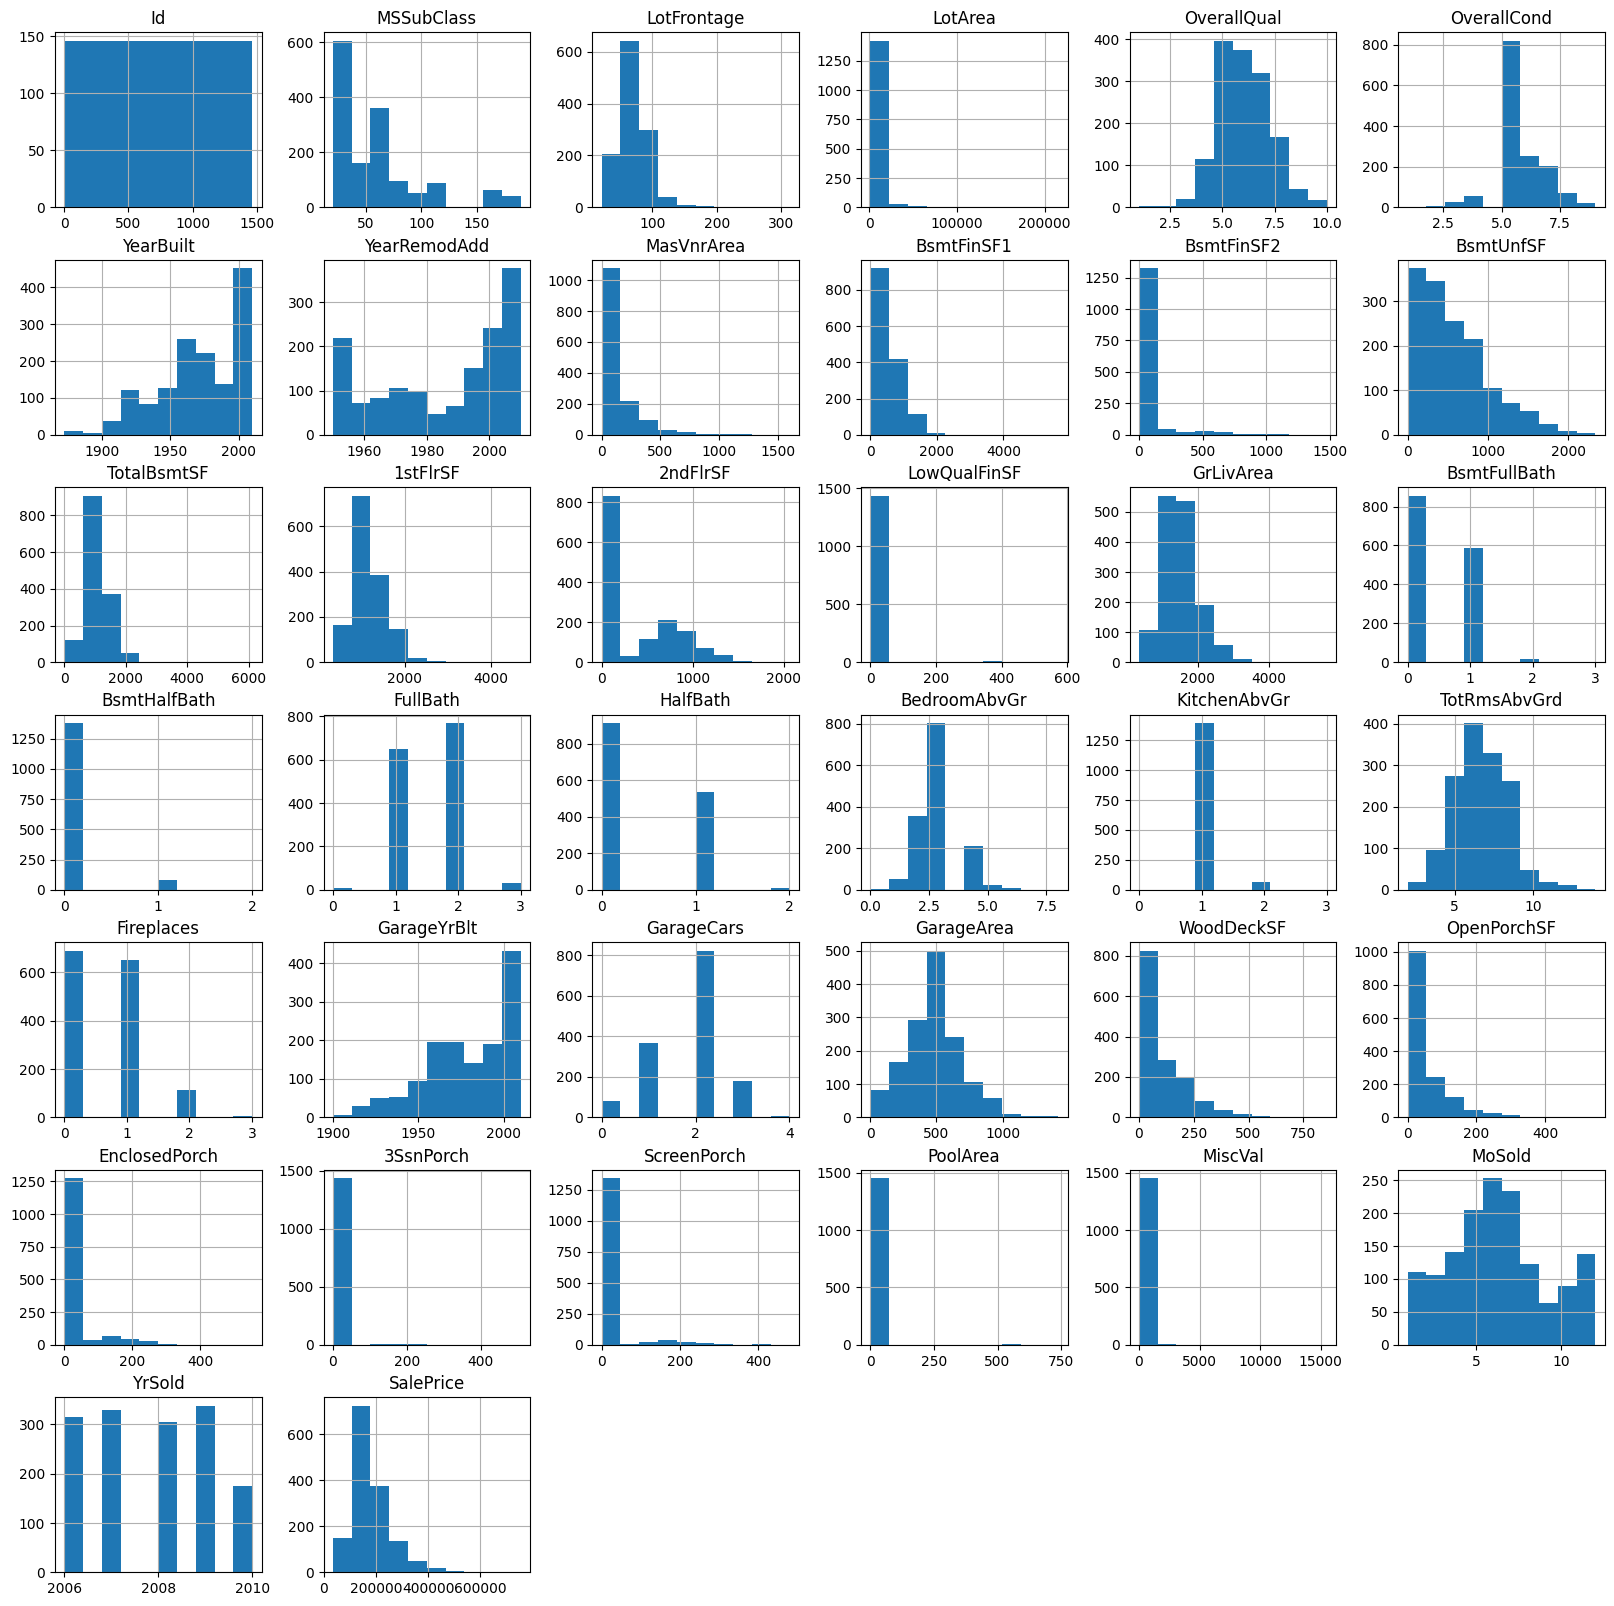

In [6]:
df_train.hist(figsize=(20,20));

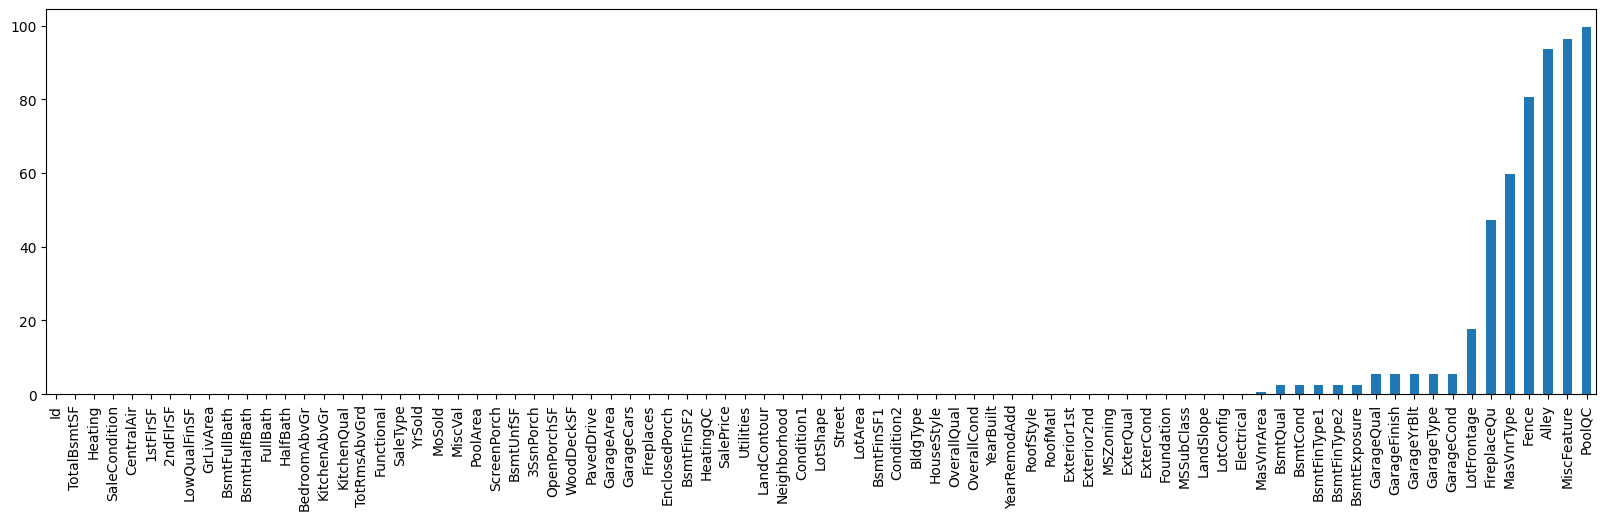

In [7]:
(df_train.isnull().sum() / len(df_train) * 100).sort_values().plot(kind='bar', figsize=(20,5));

### Numerical features

In [8]:
df_train_numerical = df_train.select_dtypes(include=['float', 'int'])

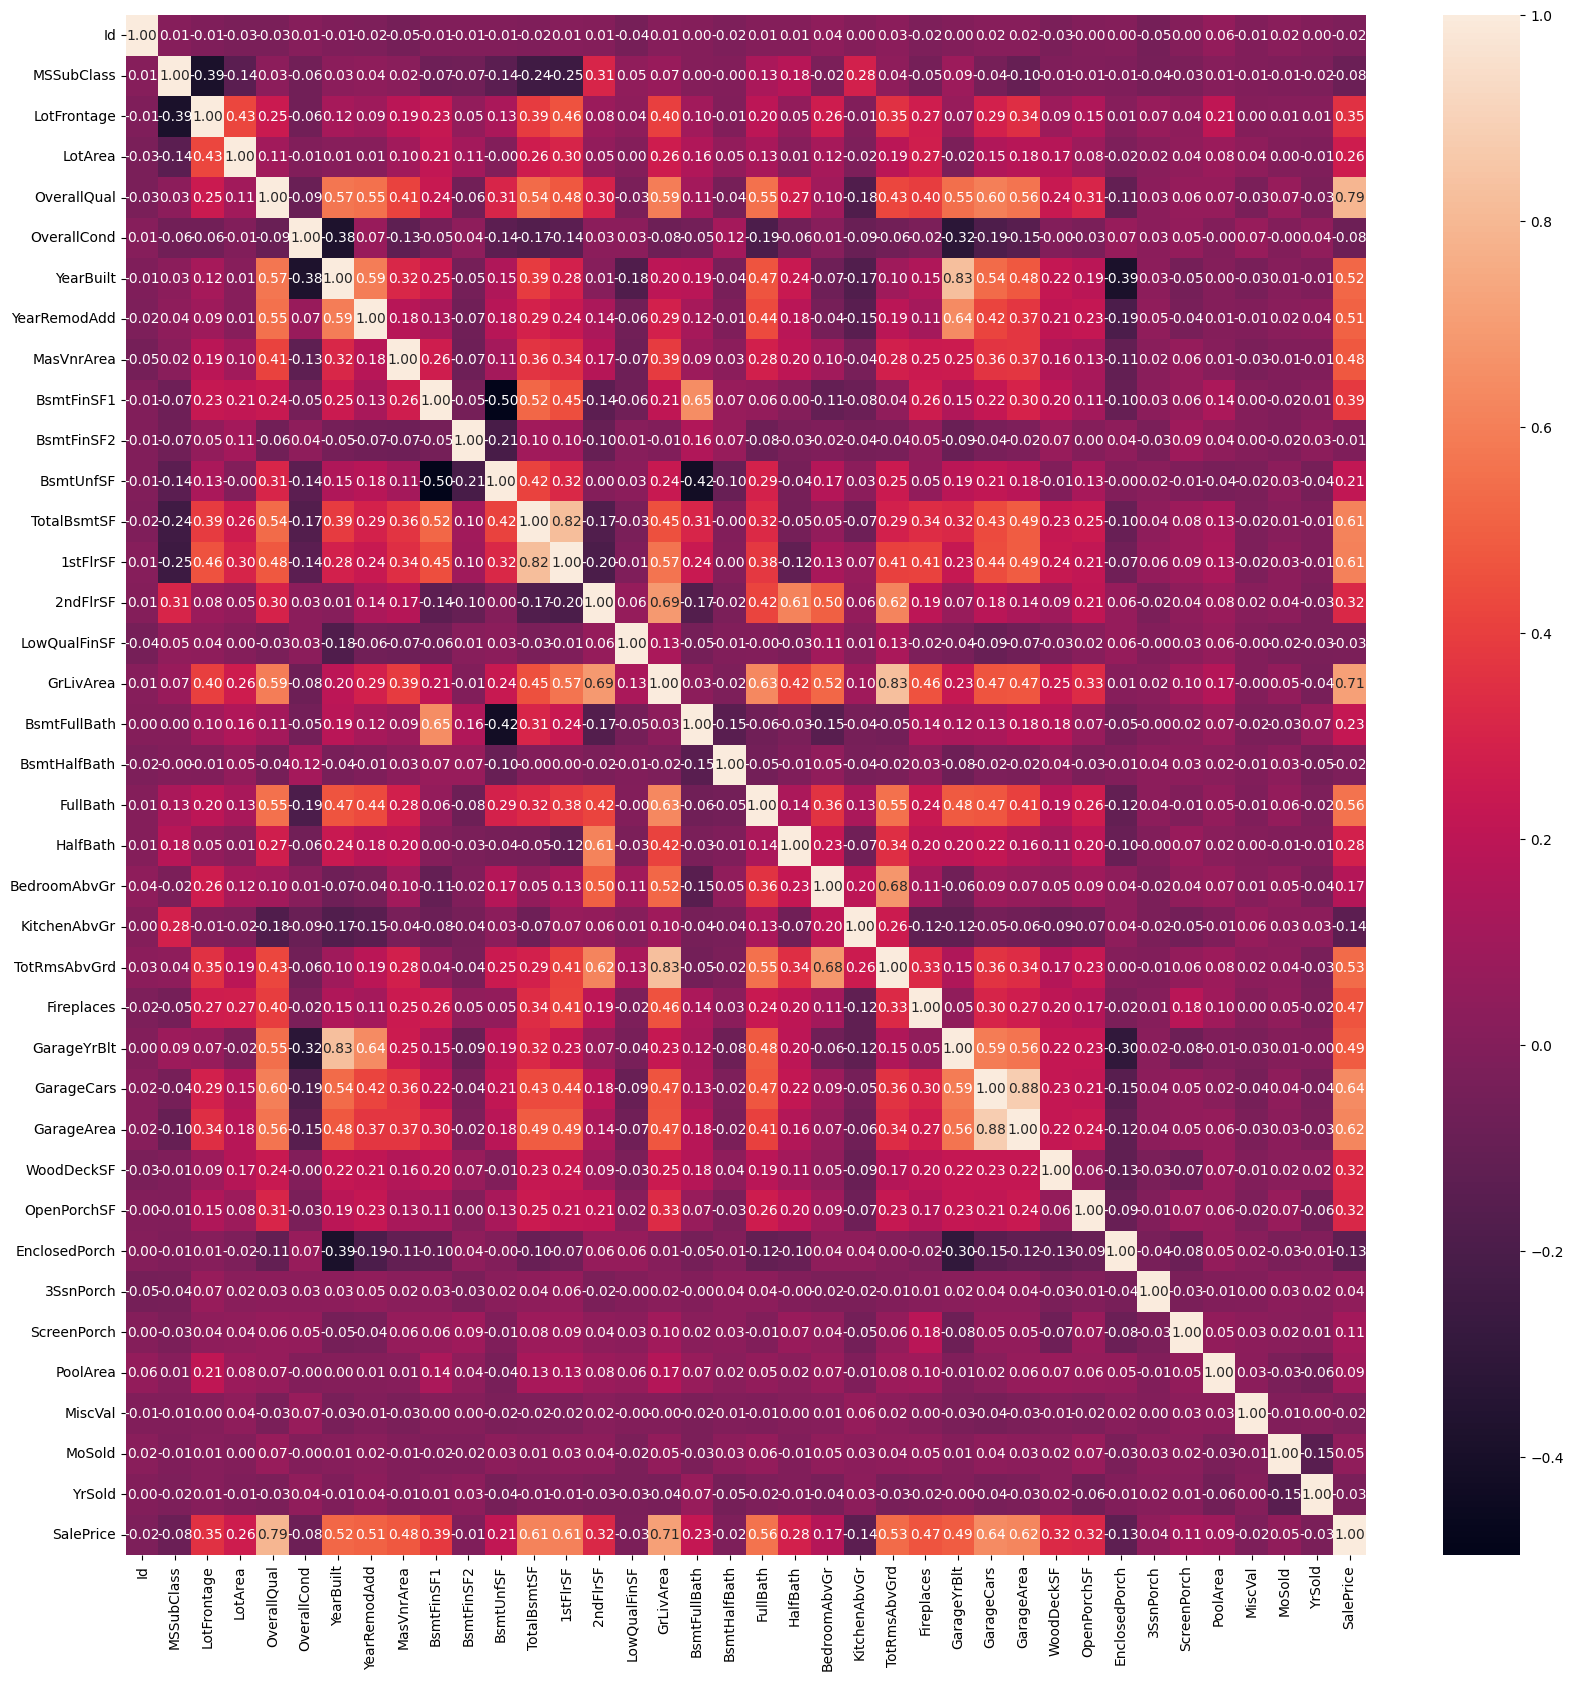

In [9]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_train_numerical.corr(), annot=True, fmt=".2f", ax=ax);

In [10]:
cols = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']

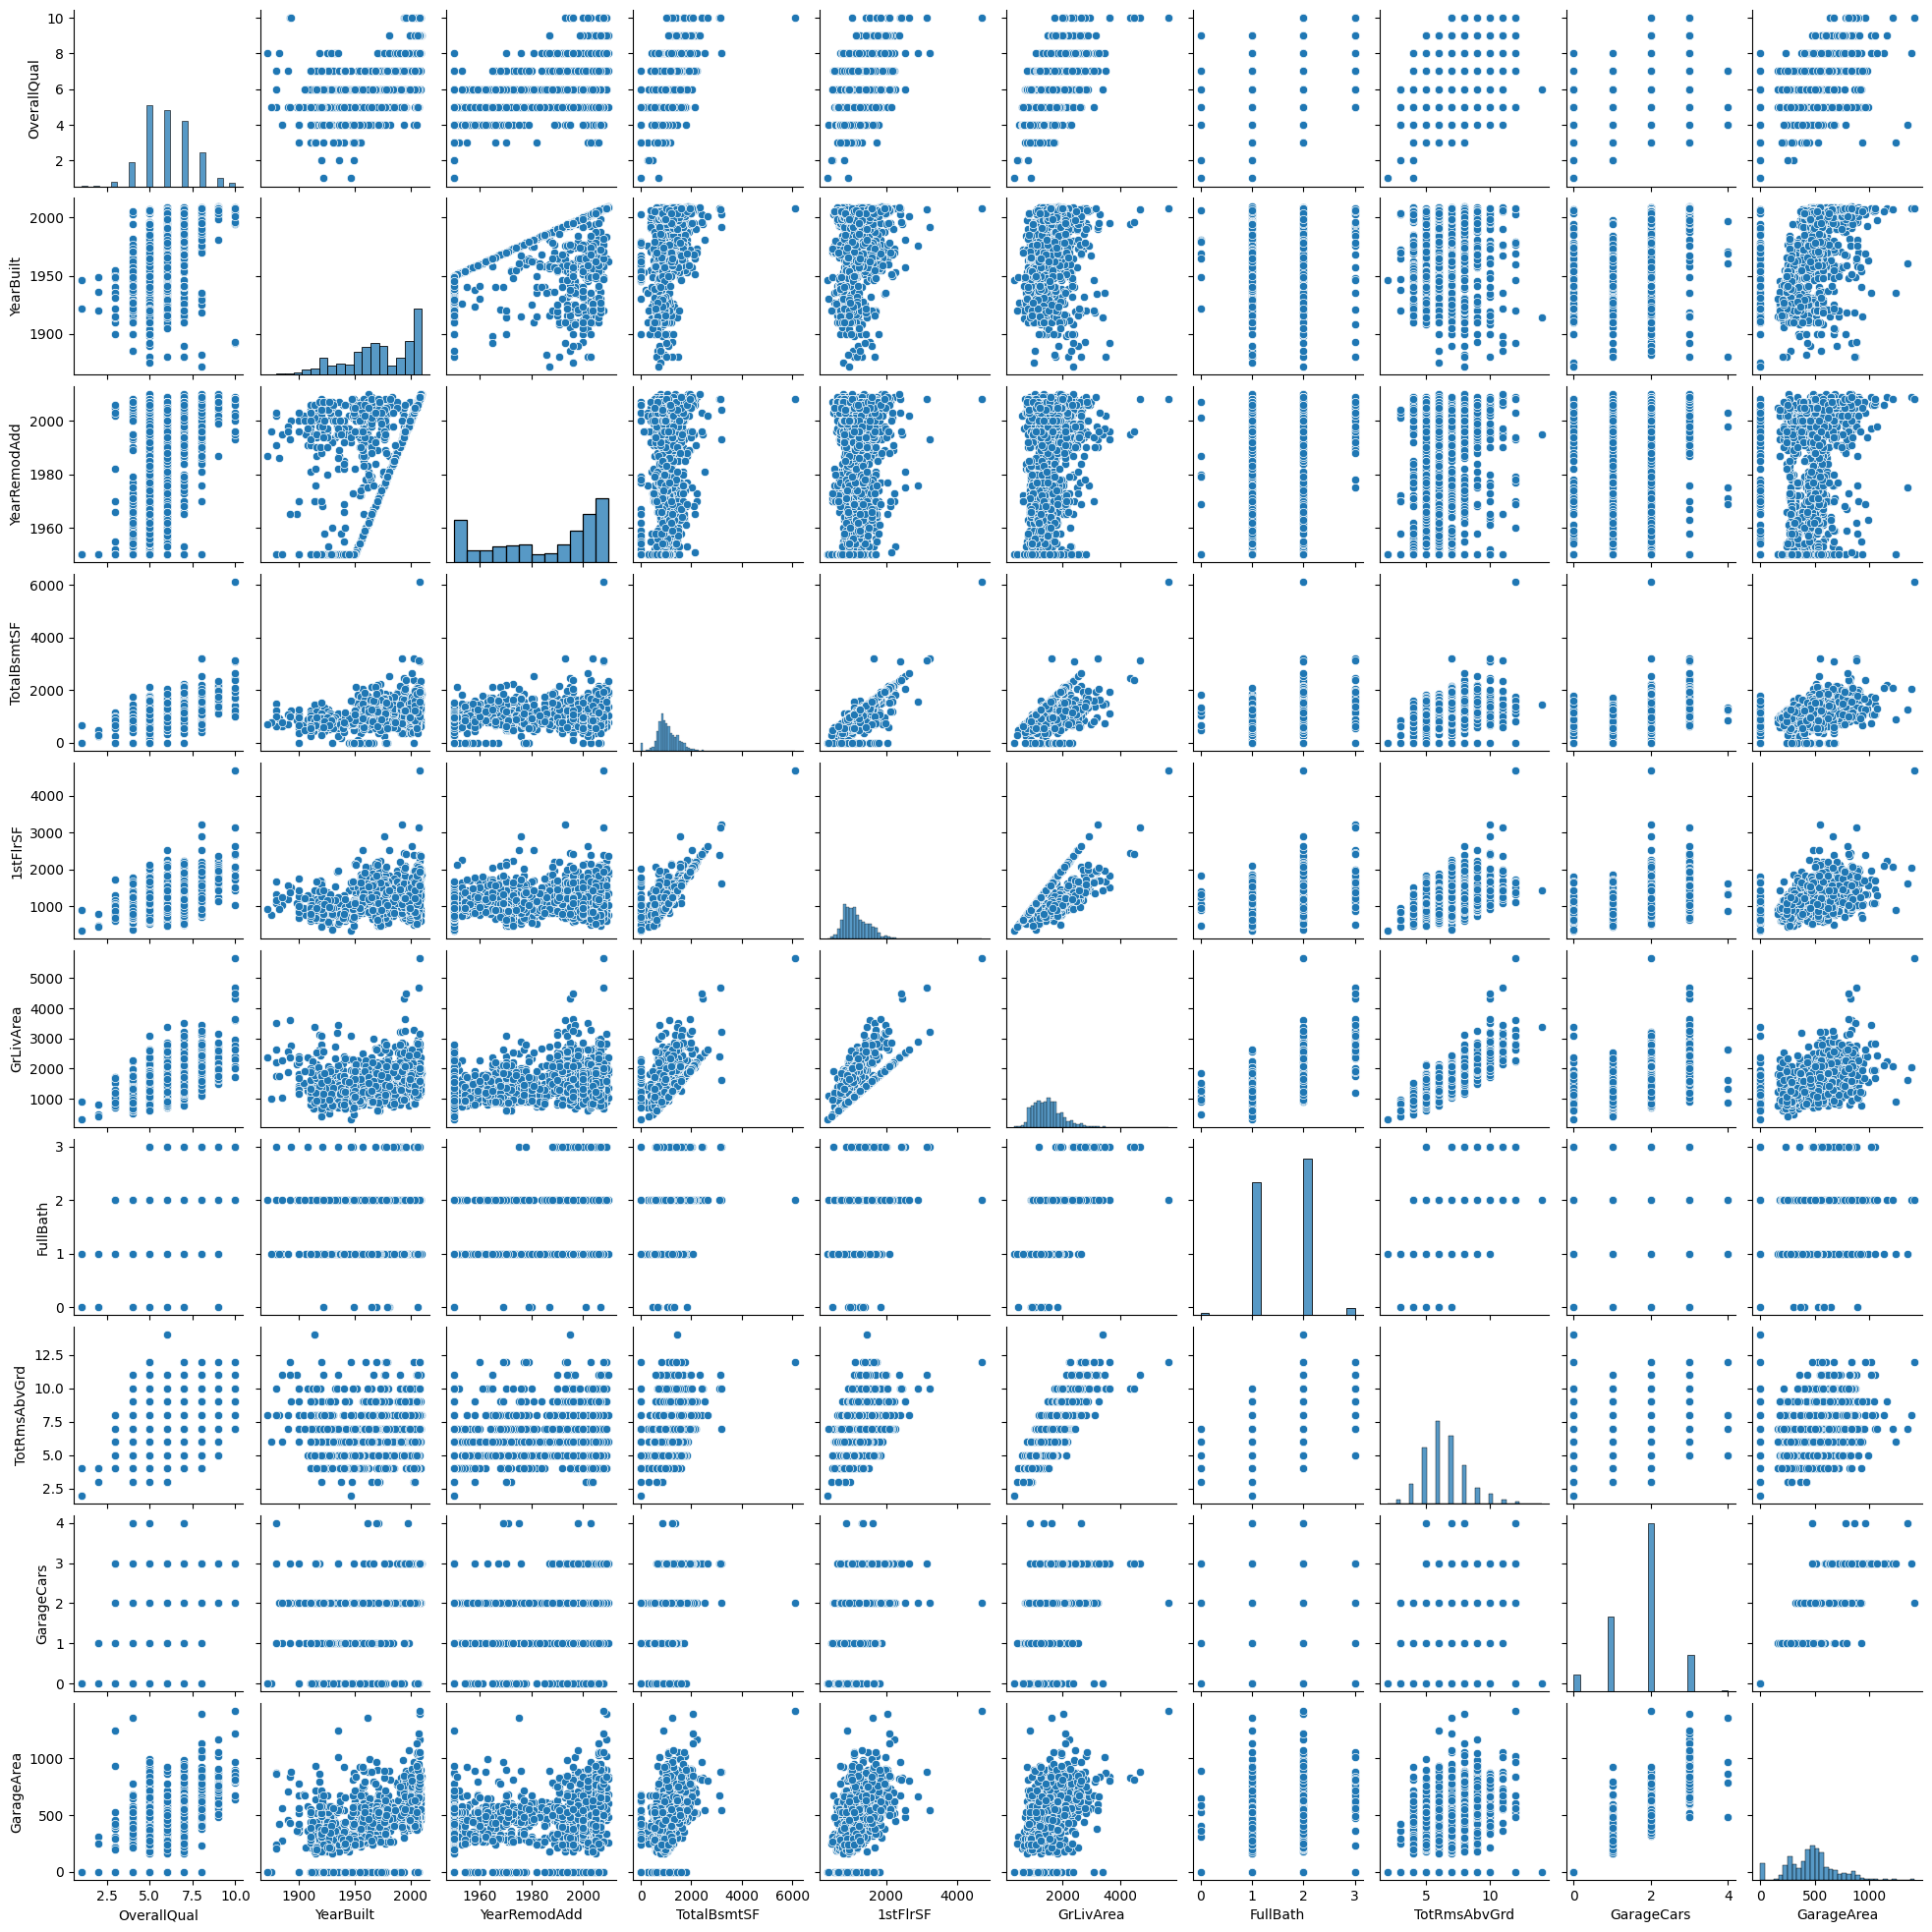

In [11]:
sns.pairplot(df_train_numerical[cols], size=2.0)

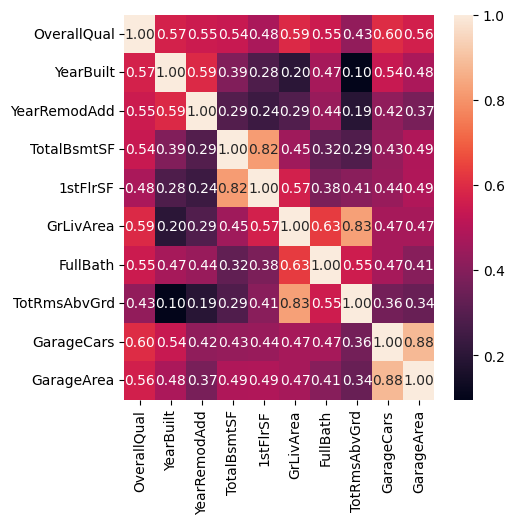

In [12]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(df_train_numerical[cols].corr(), annot=True, fmt=".2f", ax=ax);

In [13]:
for col in df_train_numerical.drop('SalePrice', axis=1).columns:   
    df_train_numerical[col].fillna((df_train_numerical[col].mean()), inplace=True)

In [14]:
df_train_for_vif = df_train_numerical.drop('SalePrice', axis=1)

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_train_for_vif.values, i) for i in range(df_train_for_vif.shape[1])]
vif.index = df_train_for_vif.columns
vif

VIF Factor
Id             4.111063e+00
MSSubClass     4.651863e+00
LotFrontage    1.746446e+01
LotArea        2.650858e+00
OverallQual    6.671674e+01
OverallCond    4.169334e+01
YearBuilt      2.137399e+04
YearRemodAdd   2.243436e+04
MasVnrArea     1.860424e+00
BsmtFinSF1              inf
BsmtFinSF2              inf
BsmtUnfSF               inf
TotalBsmtSF             inf
1stFlrSF                inf
2ndFlrSF                inf
LowQualFinSF            inf
GrLivArea               inf
BsmtFullBath   3.694831e+00
BsmtHalfBath   1.219504e+00
FullBath       2.667608e+01
HalfBath       3.421178e+00
BedroomAbvGr   3.109808e+01
KitchenAbvGr   3.760008e+01
TotRmsAbvGrd   8.352093e+01
Fireplaces     3.020518e+00
GarageYrBlt    2.292552e+04
GarageCars     3.676657e+01
GarageArea     3.224036e+01
WoodDeckSF     1.907703e+00
OpenPorchSF    1.825590e+00
EnclosedPorch  1.447160e+00
3SsnPorch      1.039278e+00
ScreenPorch    1.190977e+00
PoolArea       1.110882e+00
MiscVal        1.031229e+00
MoSold         6.649410e+00
YrSold         2.412288e+04

In [16]:
while True:
    df_vif = df_train_for_vif[vif.index].copy()
    vif["VIF Factor"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
    if(vif["VIF Factor"].max(axis = 0) > 10):
        vif = vif.drop(vif["VIF Factor"].idxmax(axis = 0), axis = 0)
    else:
        break

In [17]:
cols_no_multico = vif.index.tolist()

In [18]:
cols_no_multico.append('SalePrice')

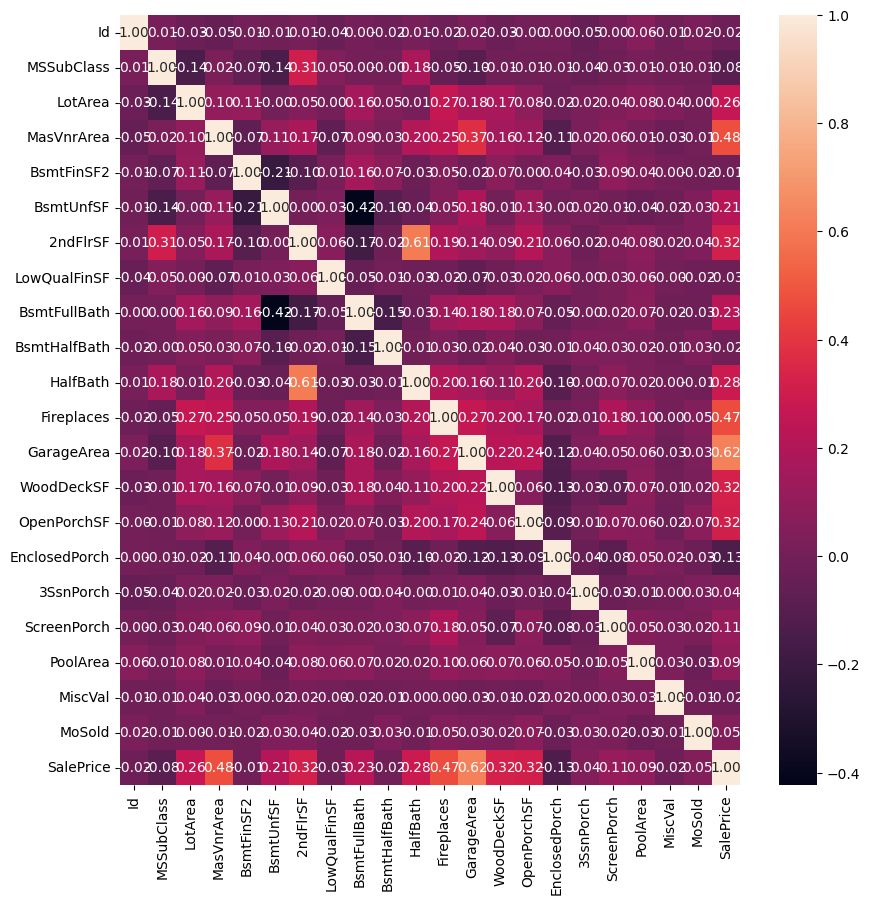

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_train_numerical[cols_no_multico].corr(), annot=True, fmt=".2f", ax=ax);

### Categorical features

In [20]:
df_train_categorical = df_train.select_dtypes(include=['object'])

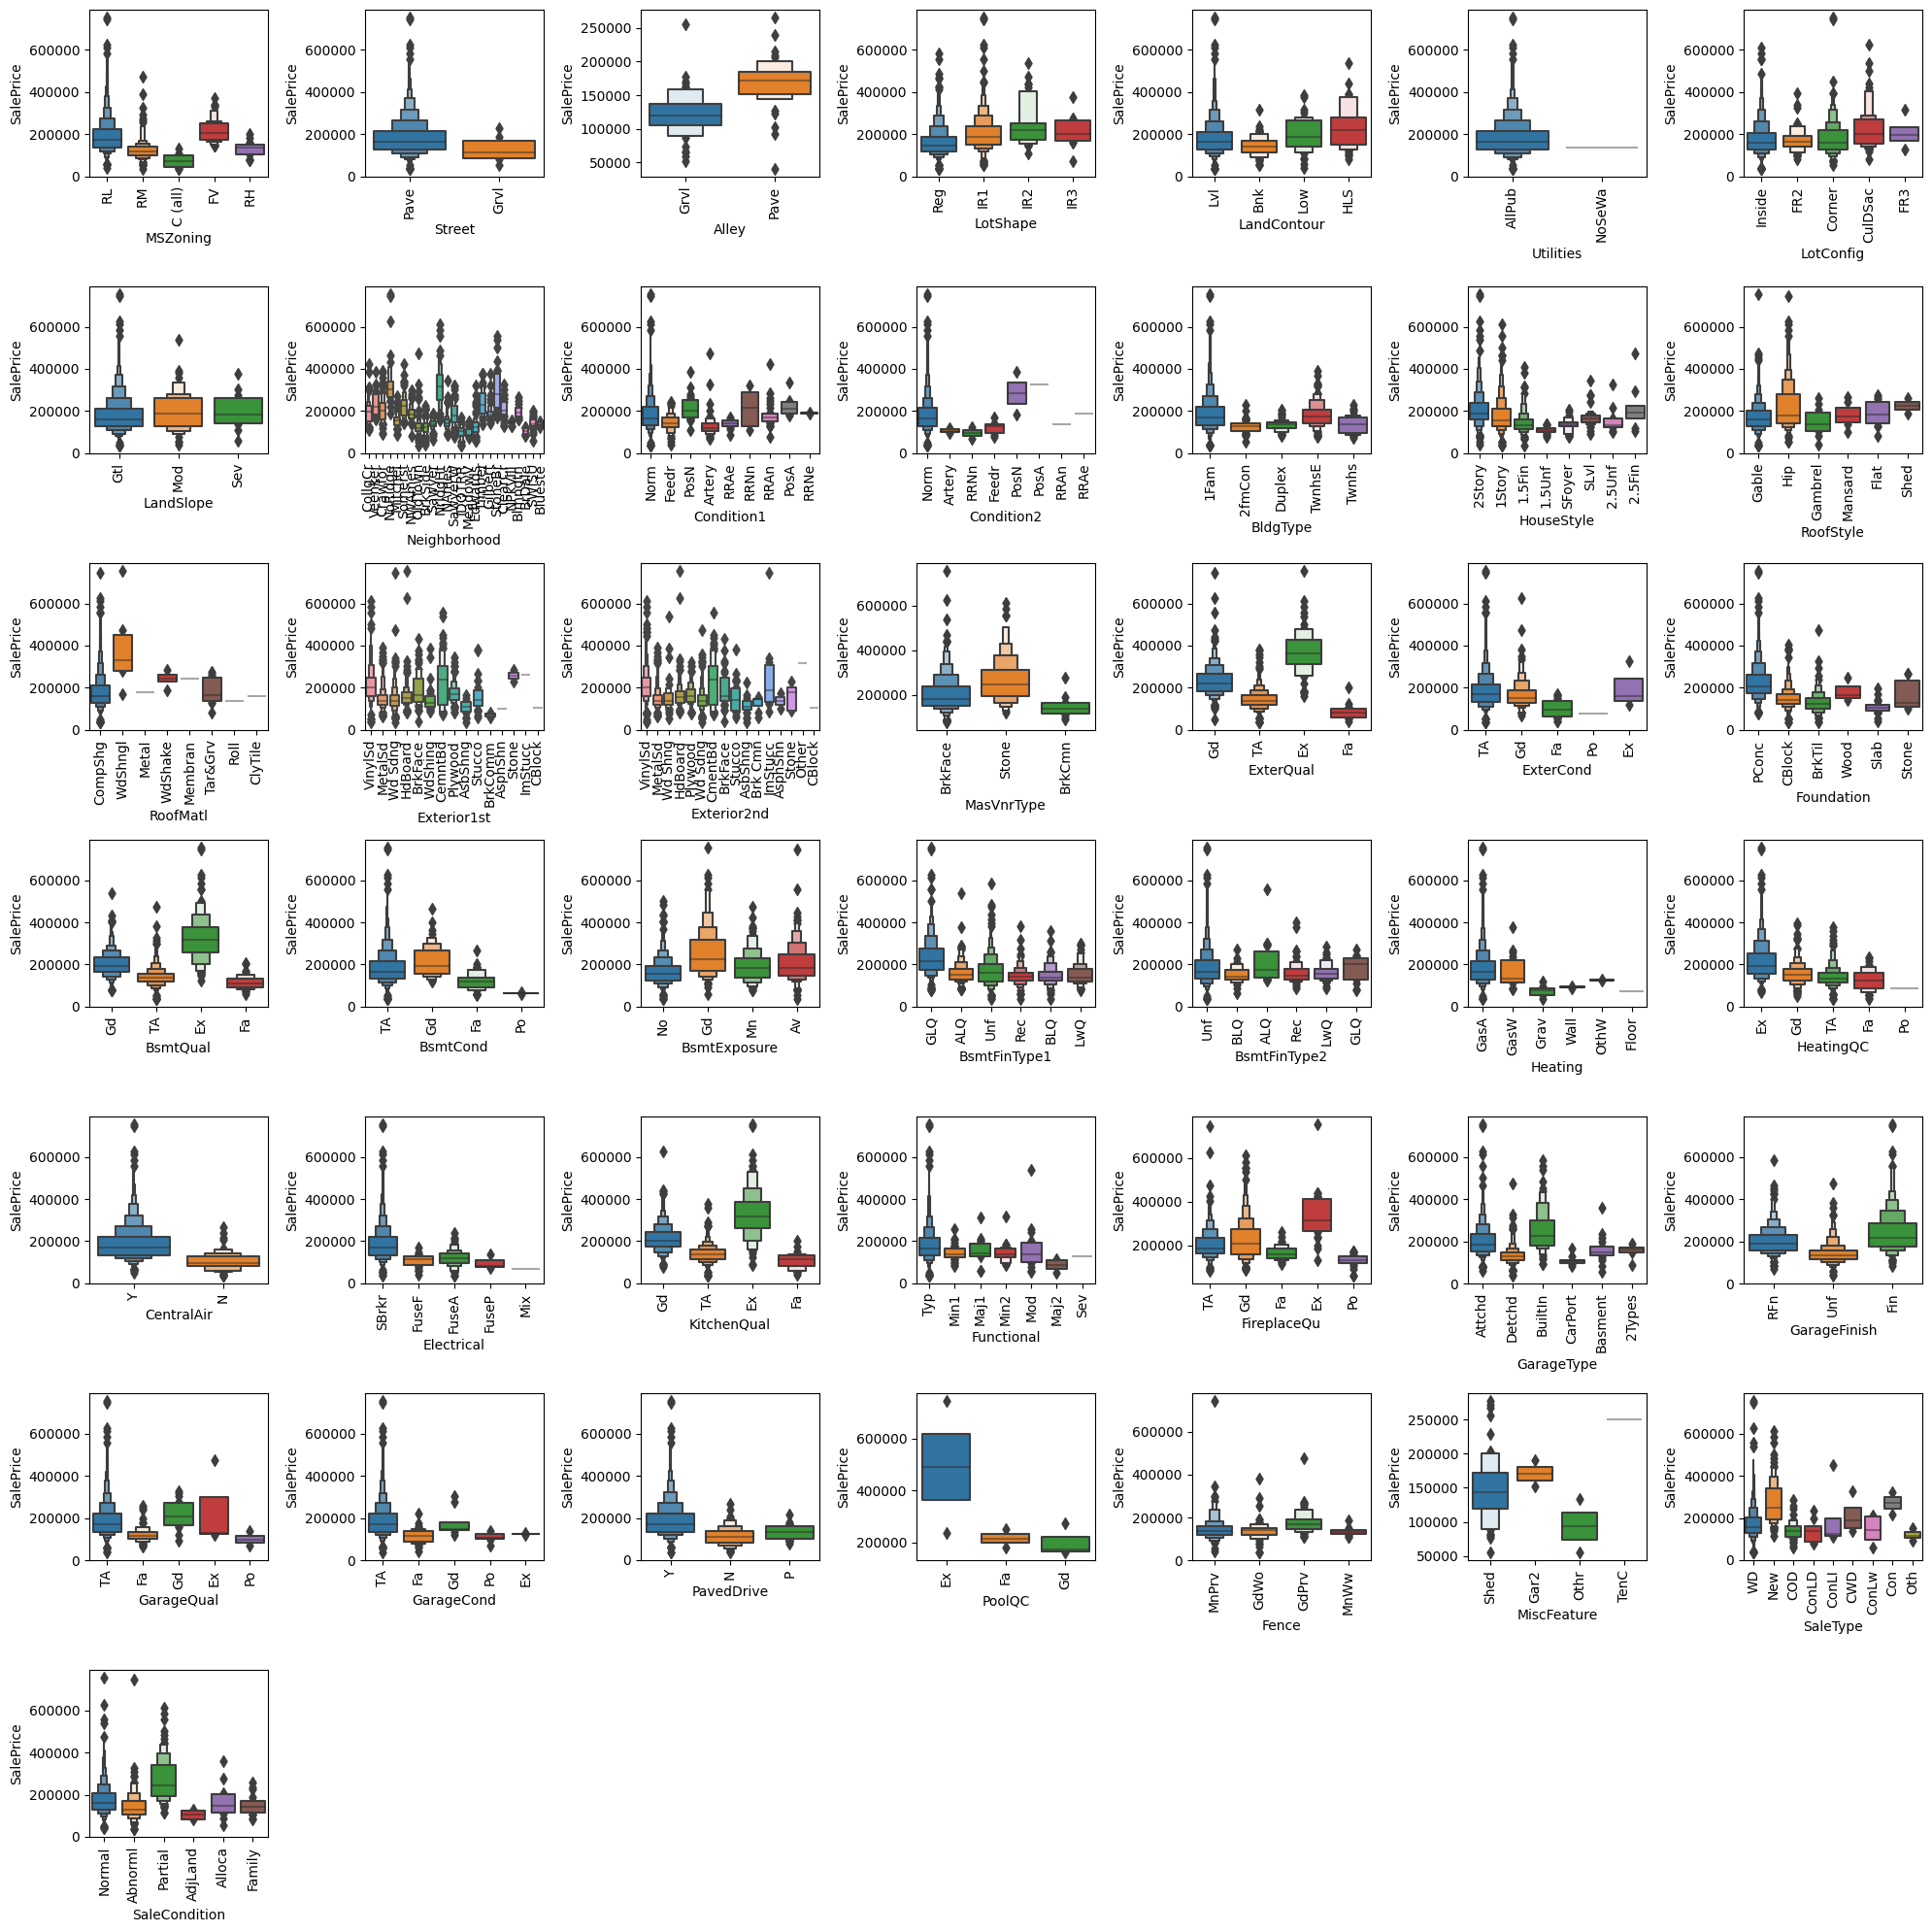

In [21]:
plt.figure(figsize=(20,20))
for i,c in enumerate(df_train_categorical.columns):
    plt.subplot(7,7,i+1)
    sns.boxenplot(data=df_train, x=c, y='SalePrice')
    plt.xticks(rotation=90)
plt.tight_layout()

In [22]:
for var in df_train_categorical.columns:
    df_train_categorical = pd.concat([df_train_categorical.drop(var, axis=1), pd.get_dummies(df_train_categorical[var], prefix=var, prefix_sep='_', drop_first=True, dummy_na=True)], axis=1)

In [23]:
df_train_categorical

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  MSZoning_nan  \
0           False        False         True        False         False   
1           False        False         True        False         False   
2           False        False         True        False         False   
3           False        False         True        False         False   
4           False        False         True        False         False   
...           ...          ...          ...          ...           ...   
1455        False        False         True        False         False   
1456        False        False         True        False         False   
1457        False        False         True        False         False   
1458        False        False         True        False         False   
1459        False        False         True        False         False   

      Street_Pave  Street_nan  Alley_Pave  Alley_nan  LotShape_IR2  ...  \
0            True       False       False       True         False  ...   
1            True       False       False       True         False  ...   
2            True       False       False       True         False  ...   
3            True       False       False       True         False  ...   
4            True       False       False       True         False  ...   
...           ...         ...         ...        ...           ...  ...   
1455         True       False       False       True         False  ...   
1456         True       False       False       True         False  ...   
1457         True       False       False       True         False  ...   
1458         True       False       False       True         False  ...   
1459         True       False       False       True         False  ...   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleType_nan  \
0            False         False         True         False   
1            False         False         True         False   
2            False         False         True         False   
3            False         False         True         False   
4            False         False         True         False   
...            ...           ...          ...           ...   
1455         False         False         True         False   
1456         False         False         True         False   
1457         False         False         True         False   
1458         False         False         True         False   
1459         False         False         True         False   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                     False                 False                 False   
1                     False                 False                 False   
2                     False                 False                 False   
3                     False                 False                 False   
4                     False                 False                 False   
...                     ...                   ...                   ...   
1455                  False                 False                 False   
1456                  False                 False                 False   
1457                  False                 False                 False   
1458                  False                 False                 False   
1459                  False                 False                 False   

      SaleCondition_Normal  SaleCondition_Partial  SaleCondition_nan  
0                     True                  False              False  
1                     True                  False              False  
2                     True                  False              False  
3                    False                  False              False  
4                     True                  False              False  
...                    ...                    ...                ...  
1455                  True                  False            

#### Auto EDA

In [24]:
import pandas_profiling as pp
profile = pp.ProfileReport(df_train)
profile.to_file(output_file="EDA_by_pandas_prolileing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
pp.ProfileReport(df_train, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 3. Prepare Data

In [26]:
vif.index.tolist()

['Id',
 'MSSubClass',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [27]:
# cols_to_need = vif.index.tolist()
cols_to_need = ['GarageArea', 'MasVnrArea', 'Fireplaces', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF']

cols_to_need.extend(df_train.select_dtypes(include=['object']).columns.tolist())
cols_to_need.append('SalePrice')

In [28]:
df_train_2 = df_train[cols_to_need]
df_test_2 = df_test[df_train_2.drop('SalePrice', axis=1).columns.tolist()]

### 4. Model Data

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.feature_selection import f_regression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Your data preprocessing and model pipeline
numeric_features = df_train_2.select_dtypes(include=['float', 'int']).drop(['SalePrice'], axis=1).columns.tolist()
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())]
)

categorical_features = df_train_2.select_dtypes(include=['object']).columns.tolist()
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(f_regression, percentile=50)),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

reg = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", LinearRegression(fit_intercept=True))]
)

# Split the data into training and validation sets
X = df_train_2.drop(['SalePrice'], axis=1)
y = np.log(df_train_2['SalePrice'])
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model
reg.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_valid = reg.predict(X_valid)

# Calculate the model score
model_score = reg.score(X_valid, y_valid)
print("Model score: %.3f" % model_score)
print("RMSE: %.3f" % mean_squared_error(y_valid,y_pred_valid, squared=False))

Model score: 0.836
RMSE: 0.167


In [30]:
reg.named_steps['regressor'].coef_

array([ 5.53262986e-02, -3.25003272e-03,  4.77982280e-02,  1.15285804e-01,
        1.33084172e-02,  9.13410447e-03, -2.78753314e-01, -3.02377382e-02,
        1.16951030e-02, -6.05400086e-03, -1.45501112e-01, -1.38883475e-01,
        3.89138858e-03,  7.00765644e-02,  2.81711932e-04, -9.78208081e-02,
        6.07267411e-02,  2.96360401e-02, -7.88967720e-02, -1.18773624e-01,
       -1.91502940e-02, -1.48549079e-01, -1.54241034e-01, -3.51700131e-01,
       -9.06709871e-02,  1.45803919e-01,  1.12718899e-01, -1.47387245e-01,
       -1.01987064e-01,  3.86479837e-02,  1.89776148e-01,  4.01071982e-03,
       -1.20517187e-01, -6.55101280e-02,  1.39833411e-03,  1.40968096e-01,
        1.43560967e-01,  1.82193819e-01, -8.15066337e-03, -2.45571706e-02,
       -5.94997692e-04, -1.16688306e-01, -8.69031597e-02, -2.47453286e-02,
        2.66901284e-01, -1.15107197e-02, -3.15649264e-01,  6.57752034e-02,
        5.94635450e-02, -7.15071423e-02, -8.18394978e-02,  2.09542944e-03,
        2.40313283e-02, -

### 5. Evaluate the Results

In [31]:
y_valid_preds = reg.predict(X_valid)
r2 = r2_score(y_valid, y_valid_preds)
print("Model score: %.3f" % r2)
print("RMSE: %.3f" % mean_squared_error(y_valid,y_pred_valid, squared=False))

Model score: 0.836
RMSE: 0.167


### 6. Deploy

In [32]:
df_test_2['SalePrice'] = np.NaN
X_test = df_test_2.drop(['SalePrice'], axis=1)
y_preds_test = reg.predict(X_test)

In [33]:
df_deploy = pd.DataFrame({"Id": df_test.Id, "SalePrice": np.exp(y_preds_test)})

In [34]:
df_deploy.head()

Id      SalePrice
0  1461  125379.867708
1  1462  148313.143029
2  1463  184078.001084
3  1464  203135.797128
4  1465  198367.978940

In [35]:
df_deploy.to_csv("housePricePredictions.csv", index=False)